In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sklearn
import scipy as sp
from IPython.display import HTML

In [4]:
df3 = pd.read_csv("/home/jh0iku/Documents/q3/jbg050/dataset2.csv",encoding = "ISO-8859-1")
df3 = pd.DataFrame(df3)

In [5]:
# Not mine, from golden demon boy
def View(df):
    """
    Input: Pandas Dataframe
    Returns: Aggressive Javascript popup ad masked as df-display tool
    """
    # Using pink stylyo to look less suspicious
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #ffcce0; color: #333; font-weight: bold }
    table thead th { background-color: #ff4d94; color: #000; }
    tr, th, td { border: 1px solid #ff0066; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 12px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    
    s += '<script type="text/javascript">'
    s += 'function setCookie(name, value, expires, path, domain, secure) { \n \t document.cookie= name + "=" + escape(value) + ((expires) ? "; expires=" + expires.toGMTString() : "") + ((path) ? "; path=" + path : "") + ((domain) ? "; domain=" + domain : "") + ((secure) ? "; secure" : "");}'
    s += '</script>'
    
    s += '<script type="text/javascript">'
    s += 'document.cookie = setCookie(name="D4_1nf3Ct0r", expires="18 Dec 2013 12:00:00 UTC")'
    s += '</script>'
    
    return(HTML(s+css))

In [6]:
View(df3)

In [7]:
def cvt_camp_g(campid):
    return{df3['campaign_group_id'].unique()[i]:i 
           for i in range(len(df3['campaign_group_id'].unique()))
          }[campid]

In [8]:
def cvt_os(osid):
    return{df3['operating_system'].unique()[i]:i 
           for i in range(len(df3['operating_system'].unique()))
          }[osid]

In [9]:
def cvt_dev_type(devt):
    return{
        df3['device_type'].unique()[i]:i
        for i in range(len(df3['device_type'].unique()))
    }[devt]

In [10]:
osid_cvt = []
campid_cvt = []
dev_type_cvt = []

for i in range(0, len(df3['campaign_group_id'])):
    cv = cvt_camp_g(df3['campaign_group_id'][i])
    cv2 = cvt_os(df3['operating_system'][i])
    cv3 = cvt_dev_type(df3['device_type'][i])
    campid_cvt.append(cv)
    osid_cvt.append(cv2)
    dev_type_cvt.append(cv3)

In [11]:
df3['campid_cvt'] = campid_cvt
df3['osid_cvt'] = osid_cvt
df3['dev_cvt'] = dev_type_cvt
df3['ctr/date']= df3['ctr'] / df3['duration']
df3['atv/date']= df3['atv'] / df3['duration']

In [12]:
type_r = []
for i in range(0, len(df3)):
    x = df3['unique_user_post_click_conv'][i]
    y = df3['unique_user_post_view_conv'][i]
    if x > y:
        type_r.append(0)
    elif y > x:
        type_r.append(1)
    else:
        type_r.append(2) 

In [13]:
df3['result'] = type_r

<h1> Random Forest Imprementaion </h1>

count    468.000000
mean       0.001895
std        0.002219
min        0.000000
25%        0.000523
50%        0.001334
75%        0.002252
max        0.017528
Name: ctr, dtype: float64

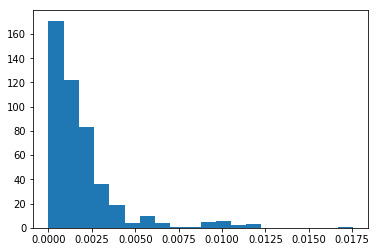

In [14]:
plt.hist(df3['ctr'],bins=20)
df3['ctr'].describe()

In [15]:
# Binary converter
def binconv(df) :
    binconvList = []
    for i in range(0, len(df)):
        if df[i] < df.describe()[1]:
            binconvList.append(0)
        else :
            binconvList.append(1)
    return binconvList

In [16]:
df3['ctr_bin']=binconv(df3['ctr'])

In [17]:
df3['unique_user_post_click_conv_bin'] = binconv(df3['unique_user_post_click_conv'])

In [18]:
df3['unique_user_post_view_conv_bin'] = binconv(df3['unique_user_post_view_conv'])

In [19]:
df4 = df3

In [20]:
View(df3)

count    468.000000
mean      14.429487
std       79.479472
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      950.000000
Name: unique_user_post_view_conv, dtype: float64

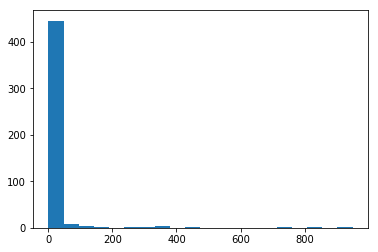

In [21]:
plt.hist(df3['unique_user_post_view_conv'],bins=20)
df3['unique_user_post_view_conv'].describe()

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
#click, noclick = df3[df3['ctr_bin']==1], df3[df3['ctr_bin']==0]

In [24]:
df3['unique_user_post_view_conv_bin'].unique()

array([0, 1])

In [25]:
category = []
for i in range(0,len(df4)):
    if df4['ctr_bin'][i] == 1:
        if df4['unique_user_post_click_conv_bin'][i] == 1:
            category.append(1)
        else:
            category.append(0)
    else:
        if df4['unique_user_post_view_conv_bin'][i] == 1:
            category.append(2)
        else: 
            category.append(3)

In [26]:
df4['category'] = category

In [27]:
View(df4)

In [28]:
#len(train['ctr_bin']) 

In [29]:
#Needed for random forest ro work since there is only one feature
op = []

for i in range(0, len(df4['ctr_bin']) ) :
    if df4['ctr_bin'][i] == 0:
        op.append(1)
    else:
        op.append(0)

df4['op'] = op

In [30]:
# Train / Test
df4['train'] = np.random.uniform(0,1, len(df4)) <= 0.9
df4.head()
train, test = df4[df4['train']==True], df4[df4['train']==False]

In [31]:
len(train)

422

In [32]:
y = train['category']
y =  np.asarray(y)
X = list(zip(train['ctr_bin'],train['op']))
X = np.asarray(X)

In [33]:
clf = RandomForestClassifier(n_jobs=4,random_state=0,n_estimators=30)

In [34]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
X_test = np.asarray(list(zip(test['ctr_bin'],test['op'])))
clf.predict(X_test)

array([0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0,
       3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3])

<h1> Result </h1>

In [36]:
clf.predict_proba(X_test)

array([[0.7972883 , 0.2027117 , 0.        , 0.        ],
       [0.7972883 , 0.2027117 , 0.        , 0.        ],
       [0.7972883 , 0.2027117 , 0.        , 0.        ],
       [0.7972883 , 0.2027117 , 0.        , 0.        ],
       [0.        , 0.        , 0.09903548, 0.90096452],
       [0.7972883 , 0.2027117 , 0.        , 0.        ],
       [0.7972883 , 0.2027117 , 0.        , 0.        ],
       [0.        , 0.        , 0.09903548, 0.90096452],
       [0.        , 0.        , 0.09903548, 0.90096452],
       [0.        , 0.        , 0.09903548, 0.90096452],
       [0.        , 0.        , 0.09903548, 0.90096452],
       [0.7972883 , 0.2027117 , 0.        , 0.        ],
       [0.        , 0.        , 0.09903548, 0.90096452],
       [0.7972883 , 0.2027117 , 0.        , 0.        ],
       [0.        , 0.        , 0.09903548, 0.90096452],
       [0.        , 0.        , 0.09903548, 0.90096452],
       [0.7972883 , 0.2027117 , 0.        , 0.        ],
       [0.        , 0.        ,

In [37]:
clf.feature_importances_

array([0.5, 0.5])

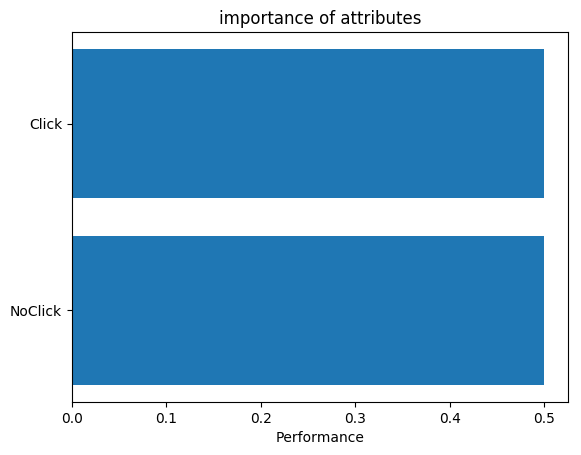

In [38]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
# people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
people = ('Click', 'NoClick')
y_pos = np.arange(len(people))
performance =clf.feature_importances_


ax.barh(y_pos, performance,  align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('importance of attributes')

plt.show()

In [39]:
#Confusion matrix
pd.crosstab(test['category'], clf.predict(X_test), rownames=['category'], colnames=['pred category'])

pred category,0,3
category,,
0,10,0
1,4,0
2,0,3
3,0,29


In [40]:
View(df4)

In [41]:
df4.groupby('ctr_bin').count()

,Unnamed: 0,X1,advertiser_name,campaign_group_id,campaign_id,device_type,operating_system,start_date,end_date,impressions,...,osid_cvt,dev_cvt,ctr/date,atv/date,result,unique_user_post_click_conv_bin,unique_user_post_view_conv_bin,category,op,train
ctr_bin,,,,,,,,,,,,,,,,,,,,,
0,316,316,316,316,316,316,316,316,316,316,...,316,316,316,316,316,316,316,316,316,316
1,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152


In [42]:
#y_score = clf.decision_function()

<h1> Random Forest Regressor Imprementation </h1>

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [44]:
df5 = pd.DataFrame()

<h1> m1 </h1>

In [45]:
df5['ctr'] = df4['ctr']
df5['creativeL/impression'] = df4['creative_size_large'] / df4['impressions']
df5['creativeS/impression'] = df4['creative_size_small'] / df4['impressions']
df5['creativeM/impression'] = df4['creative_size_medium'] / df4['impressions']
df5['device_type_c'] = pd.Series(df4['device_type'],dtype='category')
df5['os_type_c'] = pd.Series(df4['operating_system'],dtype='category')
df5['impinv/imp'] = df4['impressions_inview'] / df4['impressions']

In [46]:
#Splitting but not necessary since comparing to OLS ?
df5['train'] = df4['train']
m1_train, m1_test =  df5[df5['train']==True], df5[df5['train']==False]

In [47]:
m1_X =np.asarray(list(zip(df5['creativeL/impression'],
                          df5['creativeS/impression'],
                          df5['creativeM/impression'],
                          df3['dev_cvt'],
                          df3['osid_cvt'],
                          df5['impinv/imp']
                         )))
m1_Y = np.asarray(df5['ctr'])

In [48]:
m1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 50, n_jobs=-1,
                           random_state=1,oob_score ='TRUE', max_features = 'auto' )

In [49]:
m1.fit(m1_X,m1_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score='TRUE', random_state=1, verbose=0, warm_start=False)

In [50]:
m1.feature_importances_

array([0.05025804, 0.78011444, 0.        , 0.1028409 , 0.02913869,
       0.03764794])

In [51]:
ctr_hat = m1.predict(m1_X)

<h1> m2 </h1>

In [52]:
df5['totalConversionRate'] = (df3['unique_user_post_click_conv'] + 
                              df3['unique_user_post_view_conv']) / df3['impressions']

In [53]:
m2 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 50, n_jobs=-1,
                           random_state=1,oob_score ='TRUE', max_features = 'auto')

In [54]:
View(df5)

In [55]:
m2_Y = np.asarray(df5['totalConversionRate'])
m2_X = np.asarray(list(zip(df5['creativeL/impression'],
                           df5['creativeS/impression'],
                           df5['creativeM/impression'],
                           df3['dev_cvt'],
                           df3['osid_cvt'],
                           m1_Y
                                )))

In [56]:
m2.fit(m2_X,m2_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score='TRUE', random_state=1, verbose=0, warm_start=False)

<h1> m2 result </h1>

In [57]:
m2.feature_importances_

array([0.09675513, 0.00627414, 0.03740835, 0.00101804, 0.00085817,
       0.85768618])

In [58]:
totalConversionRate_hat = m2.predict(m2_X)

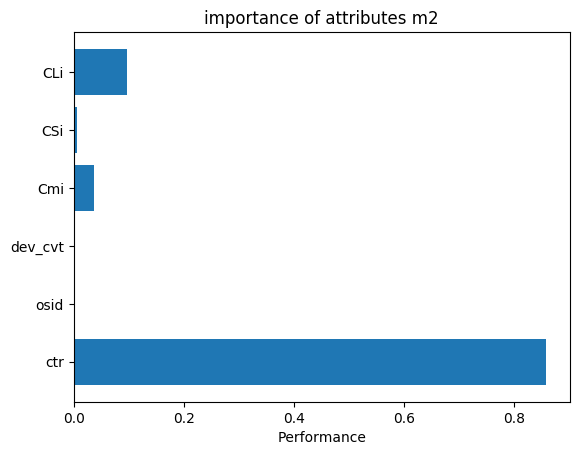

In [59]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
# people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')

m2_feature = ('CLi','CSi','Cmi','dev_cvt','osid','ctr')
y_pos_m2 = np.arange(len(m2_feature))
performance = m2.feature_importances_
ax.barh(y_pos_m2, performance,  align='center')
ax.set_yticks(y_pos_m2)
ax.set_yticklabels(m2_feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('importance of attributes m2')

plt.show()

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mean_squared_error(m2_Y,totalConversionRate_hat)

1.4172803704417179e-06

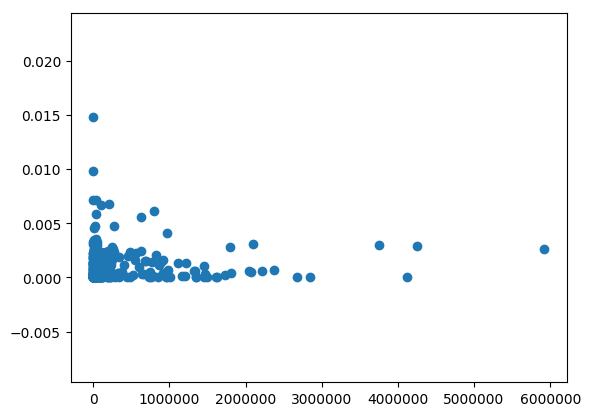

In [62]:
#Graph
plt.scatter(df3['impressions'],df5['totalConversionRate'])

In [63]:
pd.DataFrame(totalConversionRate_hat).describe()

,0
count,468.000000
mean,0.000897
std,0.000707
min,0.000184
25%,0.000459
50%,0.000618
75%,0.000962
max,0.002329


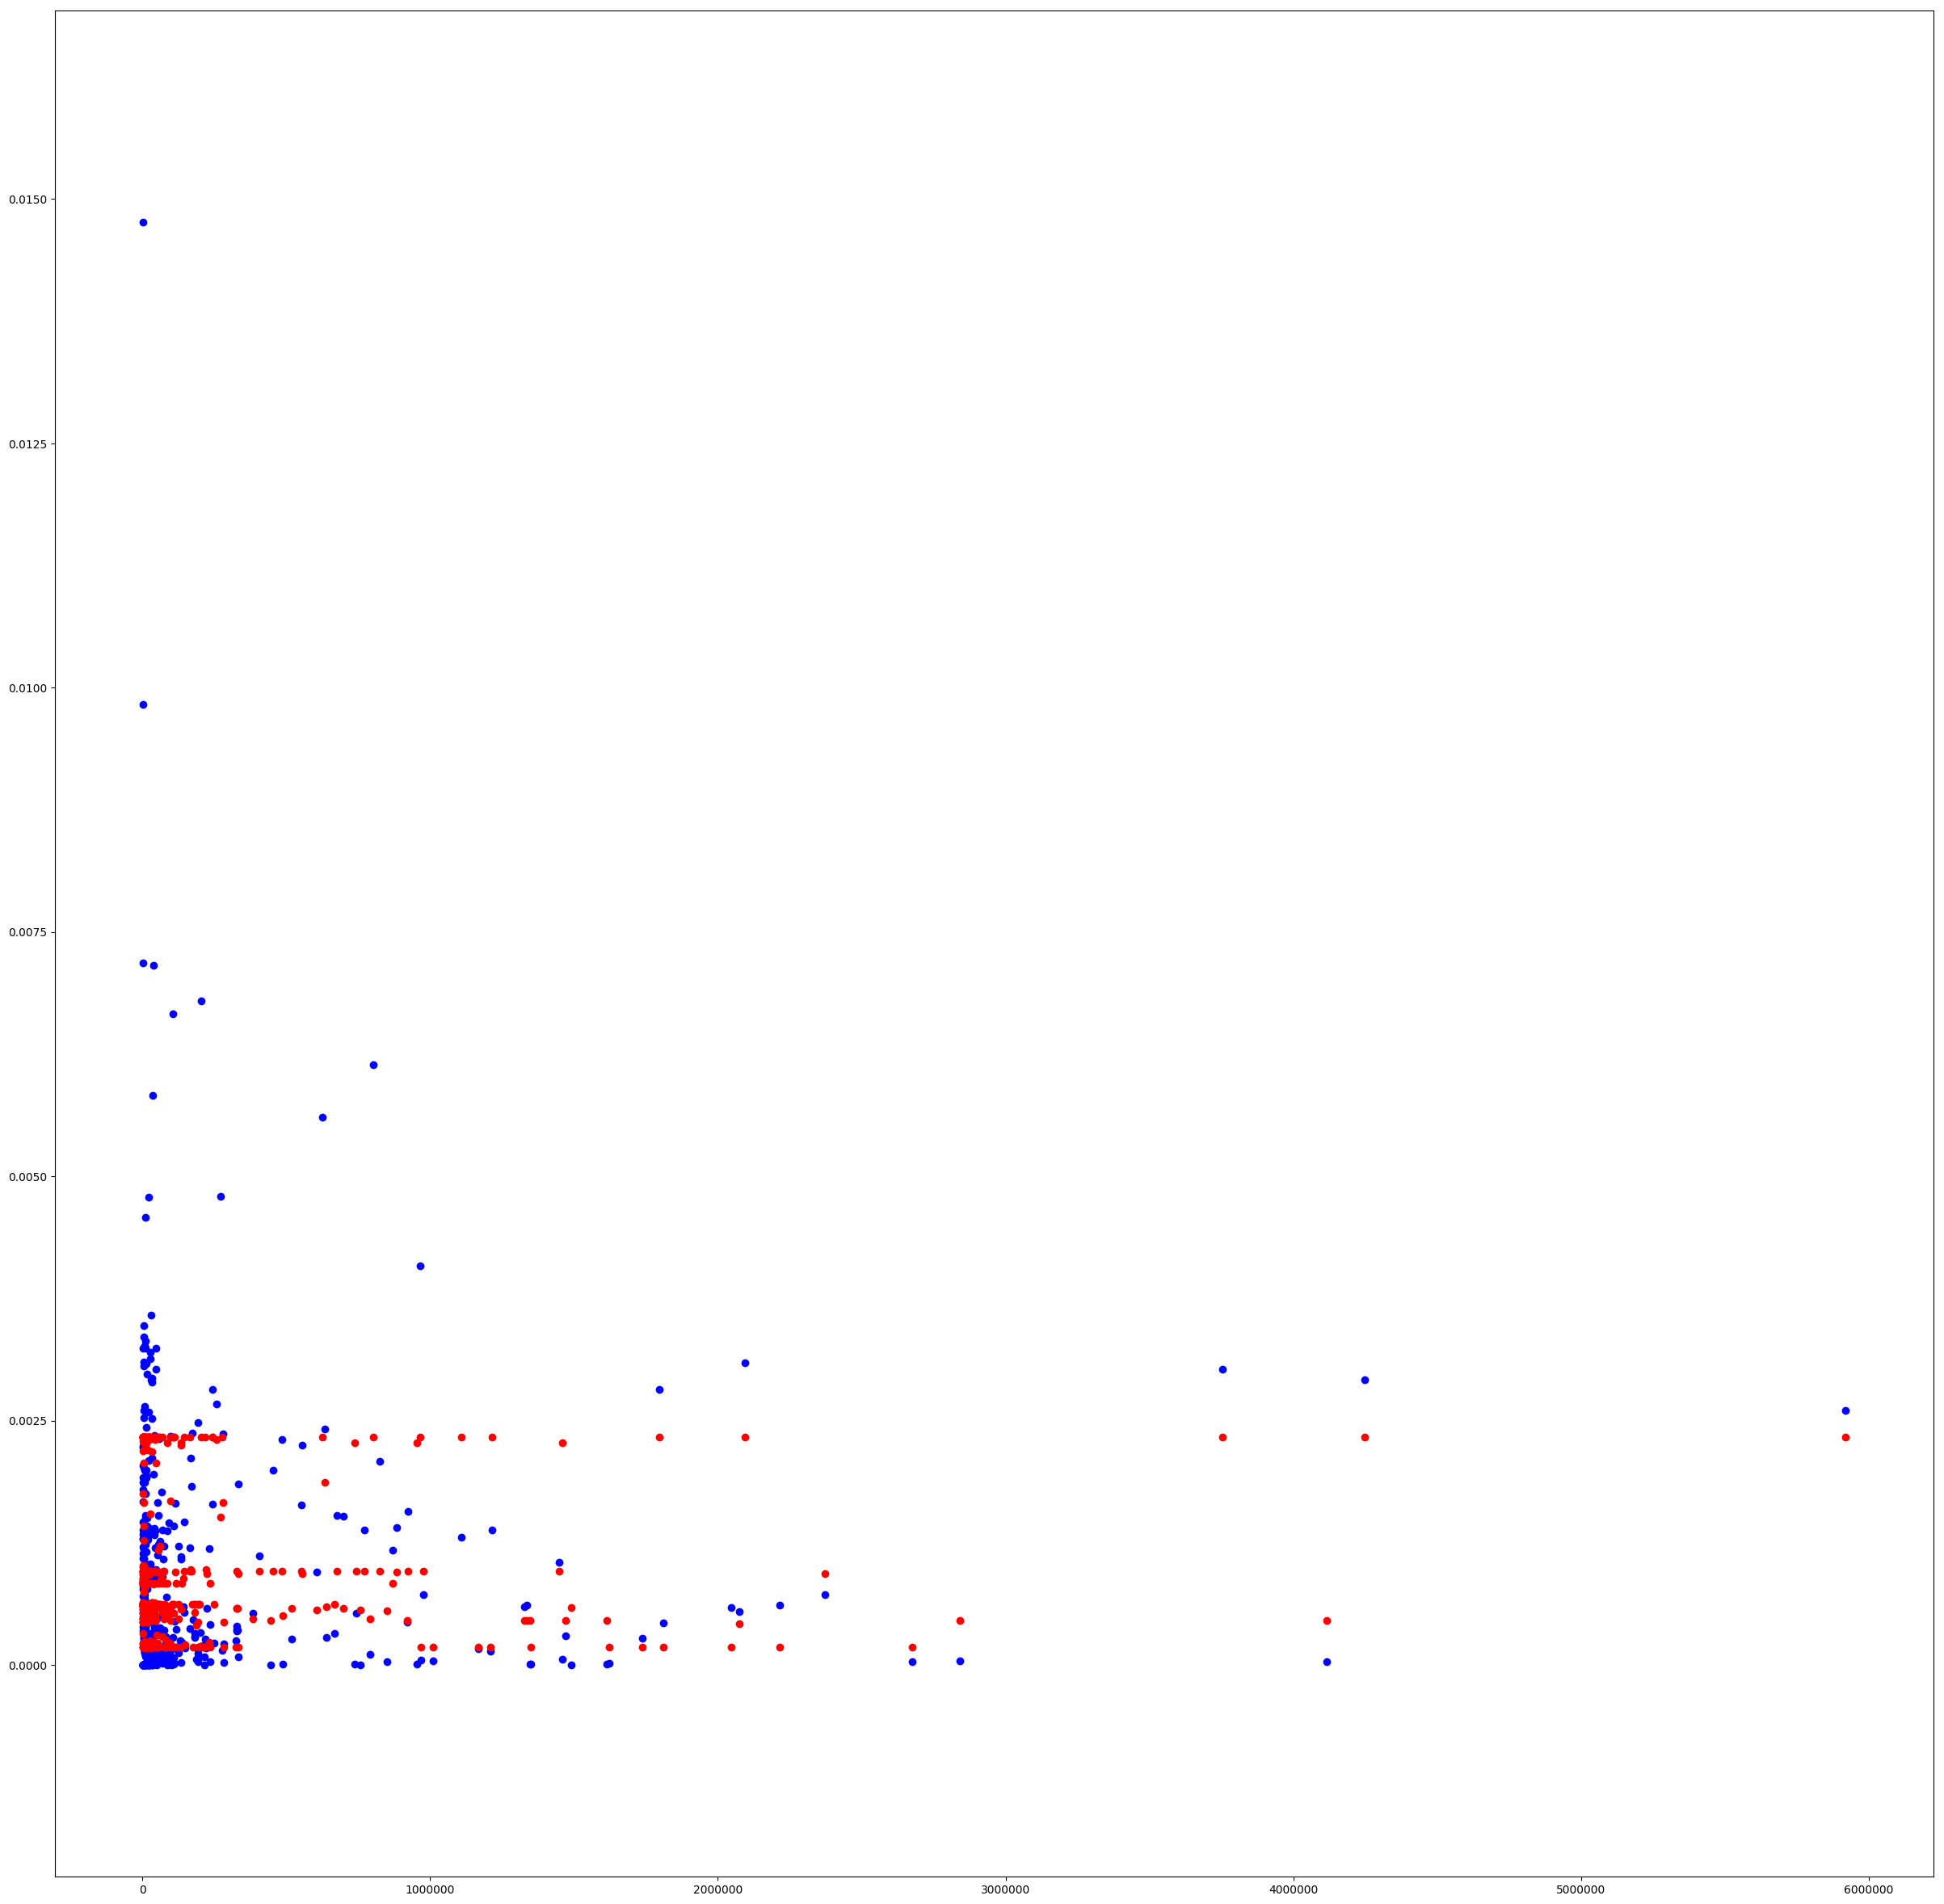

In [64]:
fig, axes = plt.subplots(figsize=(30,30))
axes.scatter(df3['impressions'],df5['totalConversionRate'],c=['b'])
axes.scatter(df3['impressions'],totalConversionRate_hat,c=['r'])

axes = fig.add_axes()
plt.show()

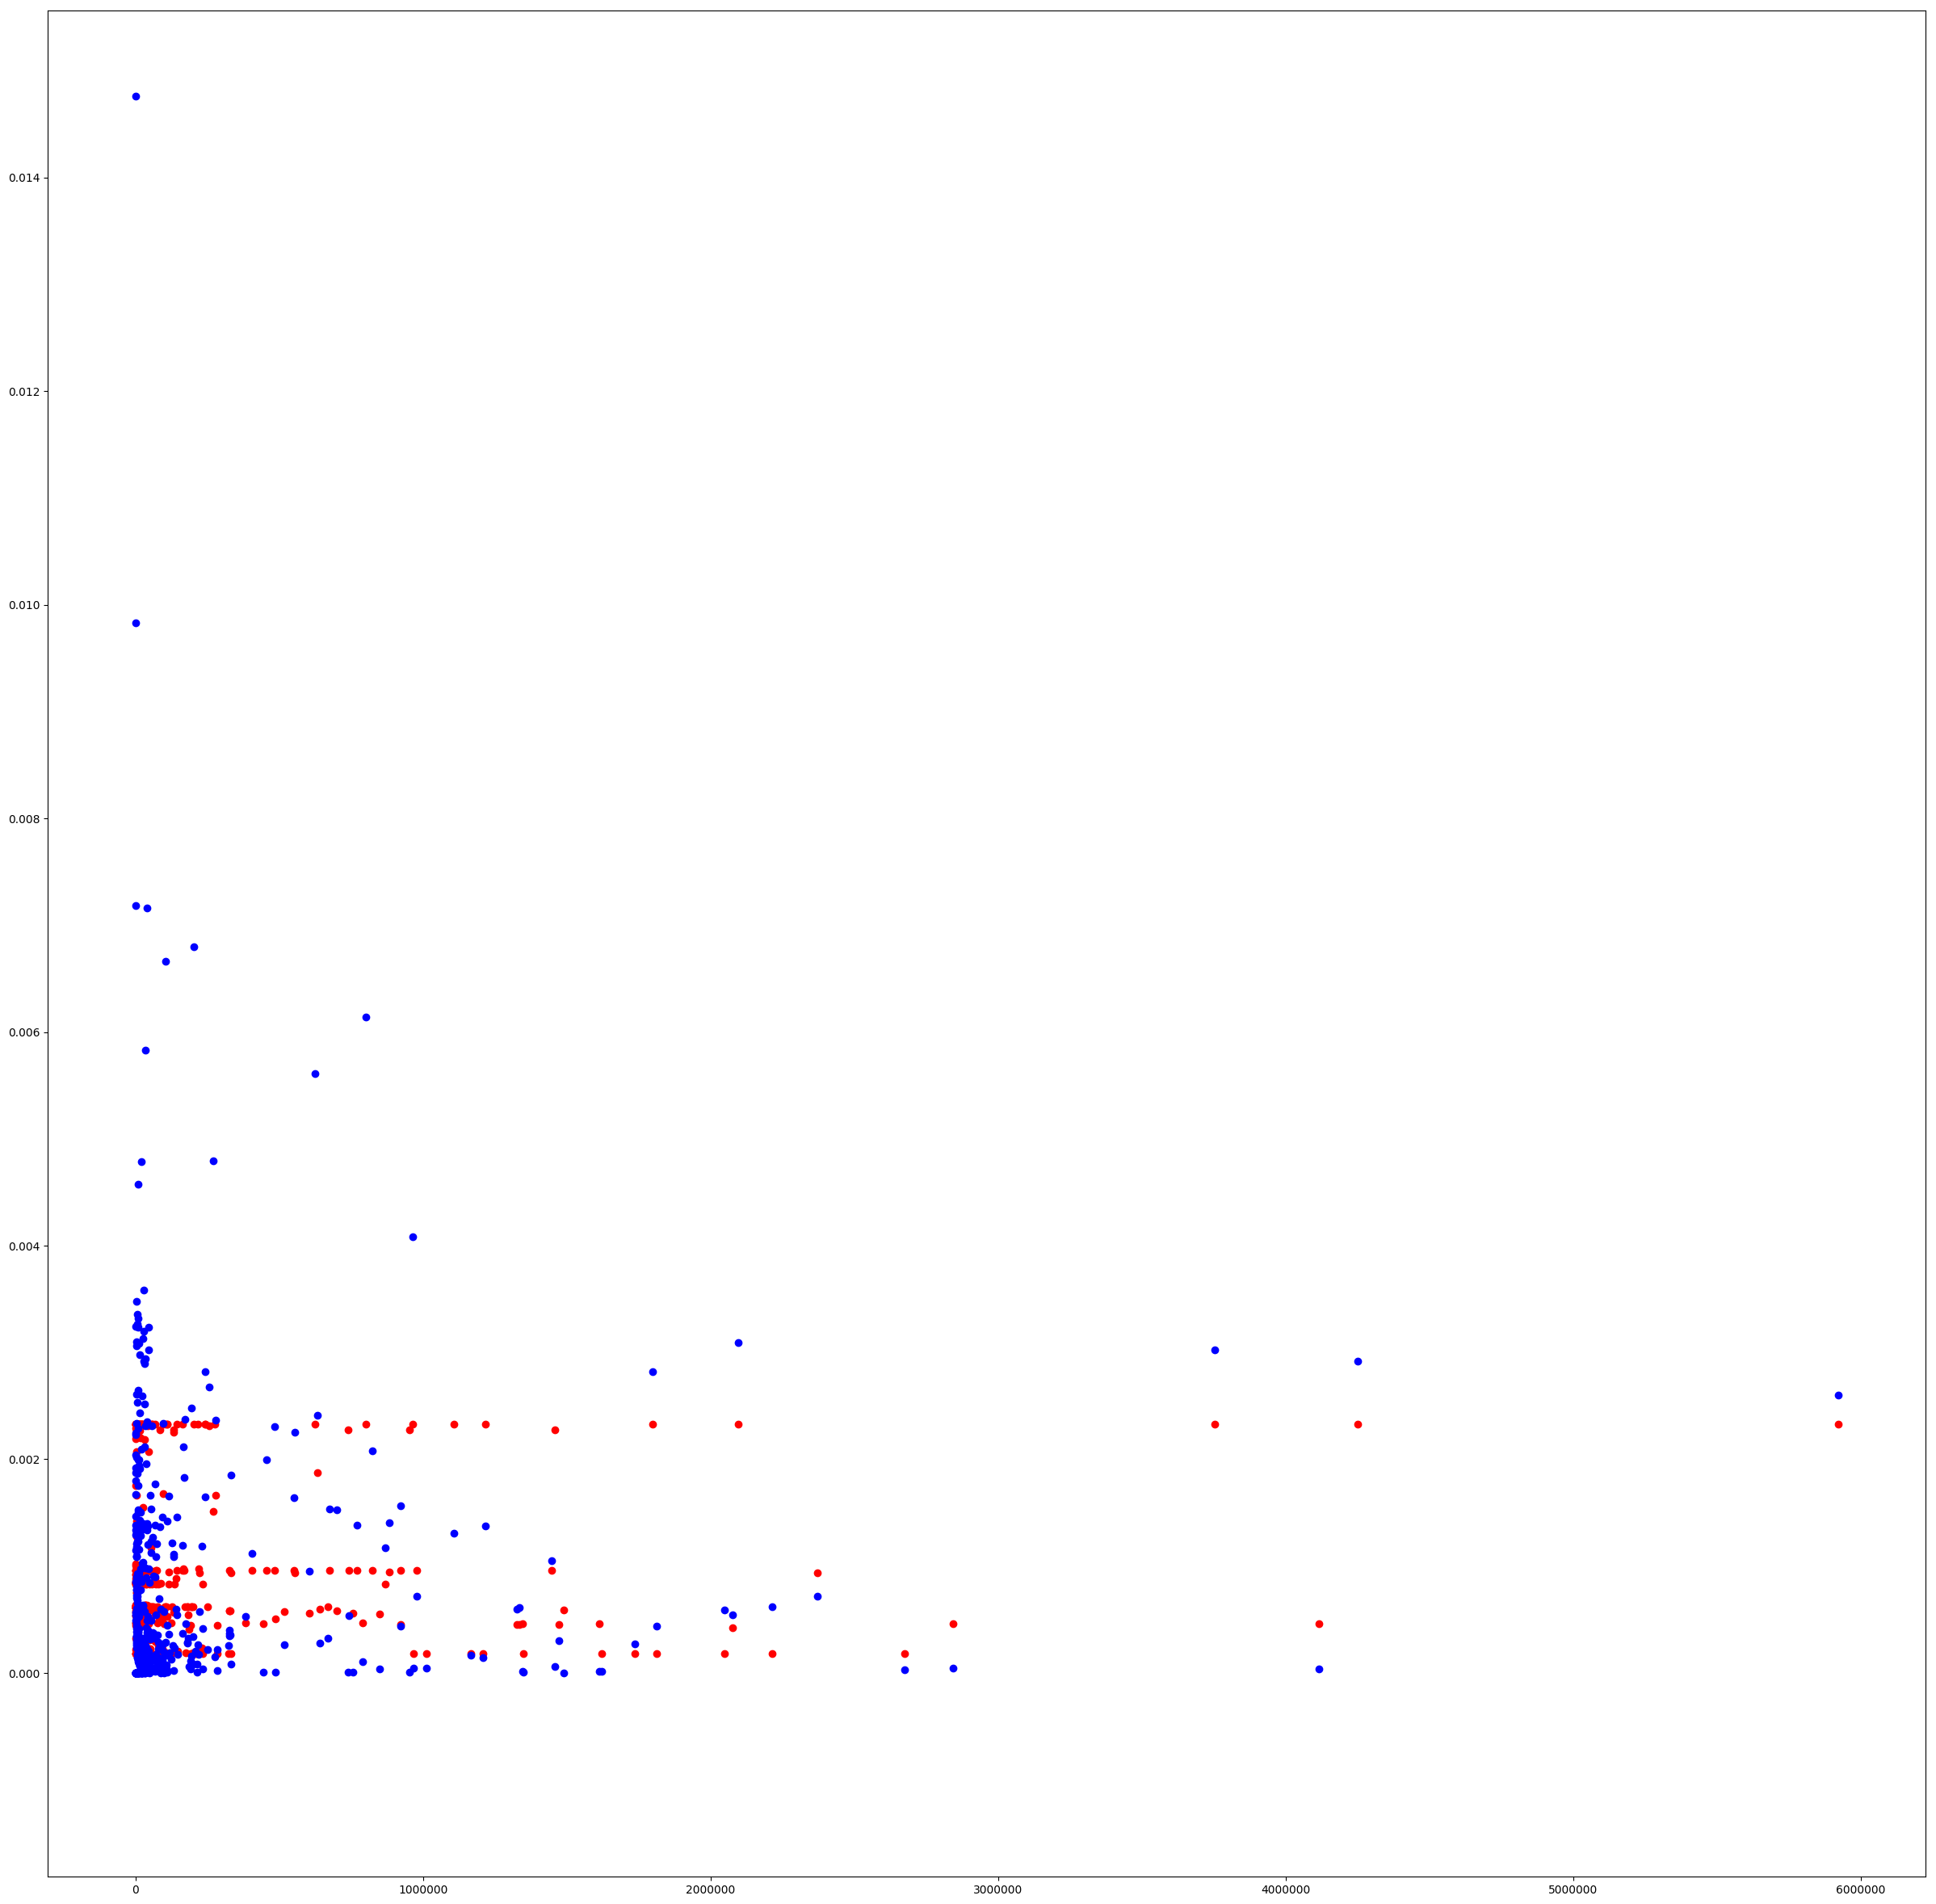

In [65]:
fig, axes = plt.subplots(figsize=(30,30))

axes.scatter(df3['impressions'],totalConversionRate_hat,c=['r'])
axes.scatter(df3['impressions'],df5['totalConversionRate'],c=['b'])


axes = fig.add_axes()
plt.show()

<h1> m3 </h1>

In [66]:
m3_X = np.asarray(list(zip(df5['creativeL/impression'],
                           df5['creativeS/impression'],
                           df5['creativeM/impression'],
                           df3['dev_cvt'],
                           df3['osid_cvt'],
                           ctr_hat
                            )))

In [67]:
m3 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 50, n_jobs=-1,
                           random_state=1,oob_score ='TRUE', max_features = 'auto')

In [68]:
m3.fit(m3_X,m2_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score='TRUE', random_state=1, verbose=0, warm_start=False)

<h1> m3 result </h1>

In [69]:
m3.feature_importances_

array([0.80486146, 0.08519175, 0.04515225, 0.00102955, 0.01203358,
       0.0517314 ])

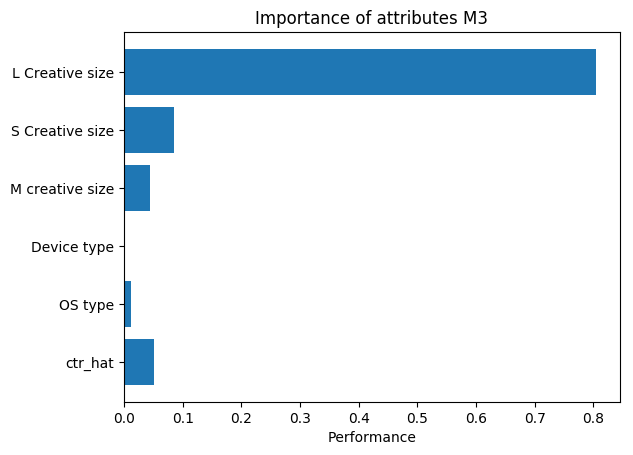

In [70]:
plt.rcdefaults()
figm3, axm3 = plt.subplots()
m3_feature_og = ('L Creative size','S Creative size','M creative size',
                'Device type','OS type','ctr_hat')
y_pos_m3_feature_og = np.arange(len(m3_feature_og))
performance_m3 = m3.feature_importances_
axm3.barh(y_pos_m3_feature_og,performance_m3 ,align='center')
axm3.set_yticks(y_pos_m3_feature_og)
axm3.set_yticklabels(m3_feature_og)
axm3.invert_yaxis()
axm3.set_xlabel('Performance')
axm3.set_title('Importance of attributes M3')

plt.show()

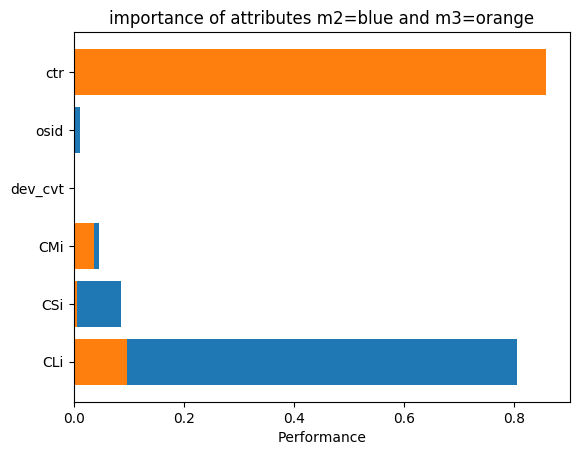

In [71]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
# people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')

m3_feature = ('CLi','CSi','Cmi','dev_cvt','osid','ctr_hat')
y_pos_m3 = np.arange(len(m3_feature))
performance = m3.feature_importances_
ax.barh(y_pos_m3, performance,  align='center')
ax.set_yticks(y_pos_m3)
ax.set_yticklabels(m3_feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('importance of attributes m3')

m2_feature = ('CLi','CSi','CMi','dev_cvt','osid','ctr')
y_pos_m2 = np.arange(len(m2_feature))
performance = m2.feature_importances_
ax.barh(y_pos_m2, performance,  align='center')
ax.set_yticks(y_pos_m2)
ax.set_yticklabels(m2_feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('importance of attributes m2=blue and m3=orange')


plt.show()

In [72]:
m3_hat = m3.predict(m3_X)

In [73]:
m3_hat

array([0.00054115, 0.00054115, 0.00166694, 0.00166694, 0.00166694,
       0.00144464, 0.00166694, 0.00166694, 0.00166694, 0.00144464,
       0.00144464, 0.00166694, 0.00169113, 0.00144464, 0.00144464,
       0.00166694, 0.00166694, 0.00166694, 0.00144464, 0.00166694,
       0.00144464, 0.00144464, 0.00166694, 0.00144464, 0.00166694,
       0.00169113, 0.00166694, 0.00166694, 0.00144464, 0.00166694,
       0.00144464, 0.00144464, 0.00144464, 0.00166694, 0.00144464,
       0.00166694, 0.00166694, 0.00166694, 0.00144464, 0.00144464,
       0.00144464, 0.00166694, 0.00166694, 0.00166694, 0.00054115,
       0.00054115, 0.00056839, 0.00054115, 0.00054115, 0.00054115,
       0.00054115, 0.00054115, 0.00054115, 0.00054115, 0.00054115,
       0.00054115, 0.00056839, 0.00051467, 0.00052104, 0.00054115,
       0.00054115, 0.00054115, 0.00054115, 0.00051196, 0.00052104,
       0.00051467, 0.00054115, 0.00051196, 0.00052104, 0.00054115,
       0.00051467, 0.00166694, 0.00144464, 0.00144464, 0.00166

In [74]:
mean_squared_error(m2_Y,m3_hat)

1.6125252311622445e-06

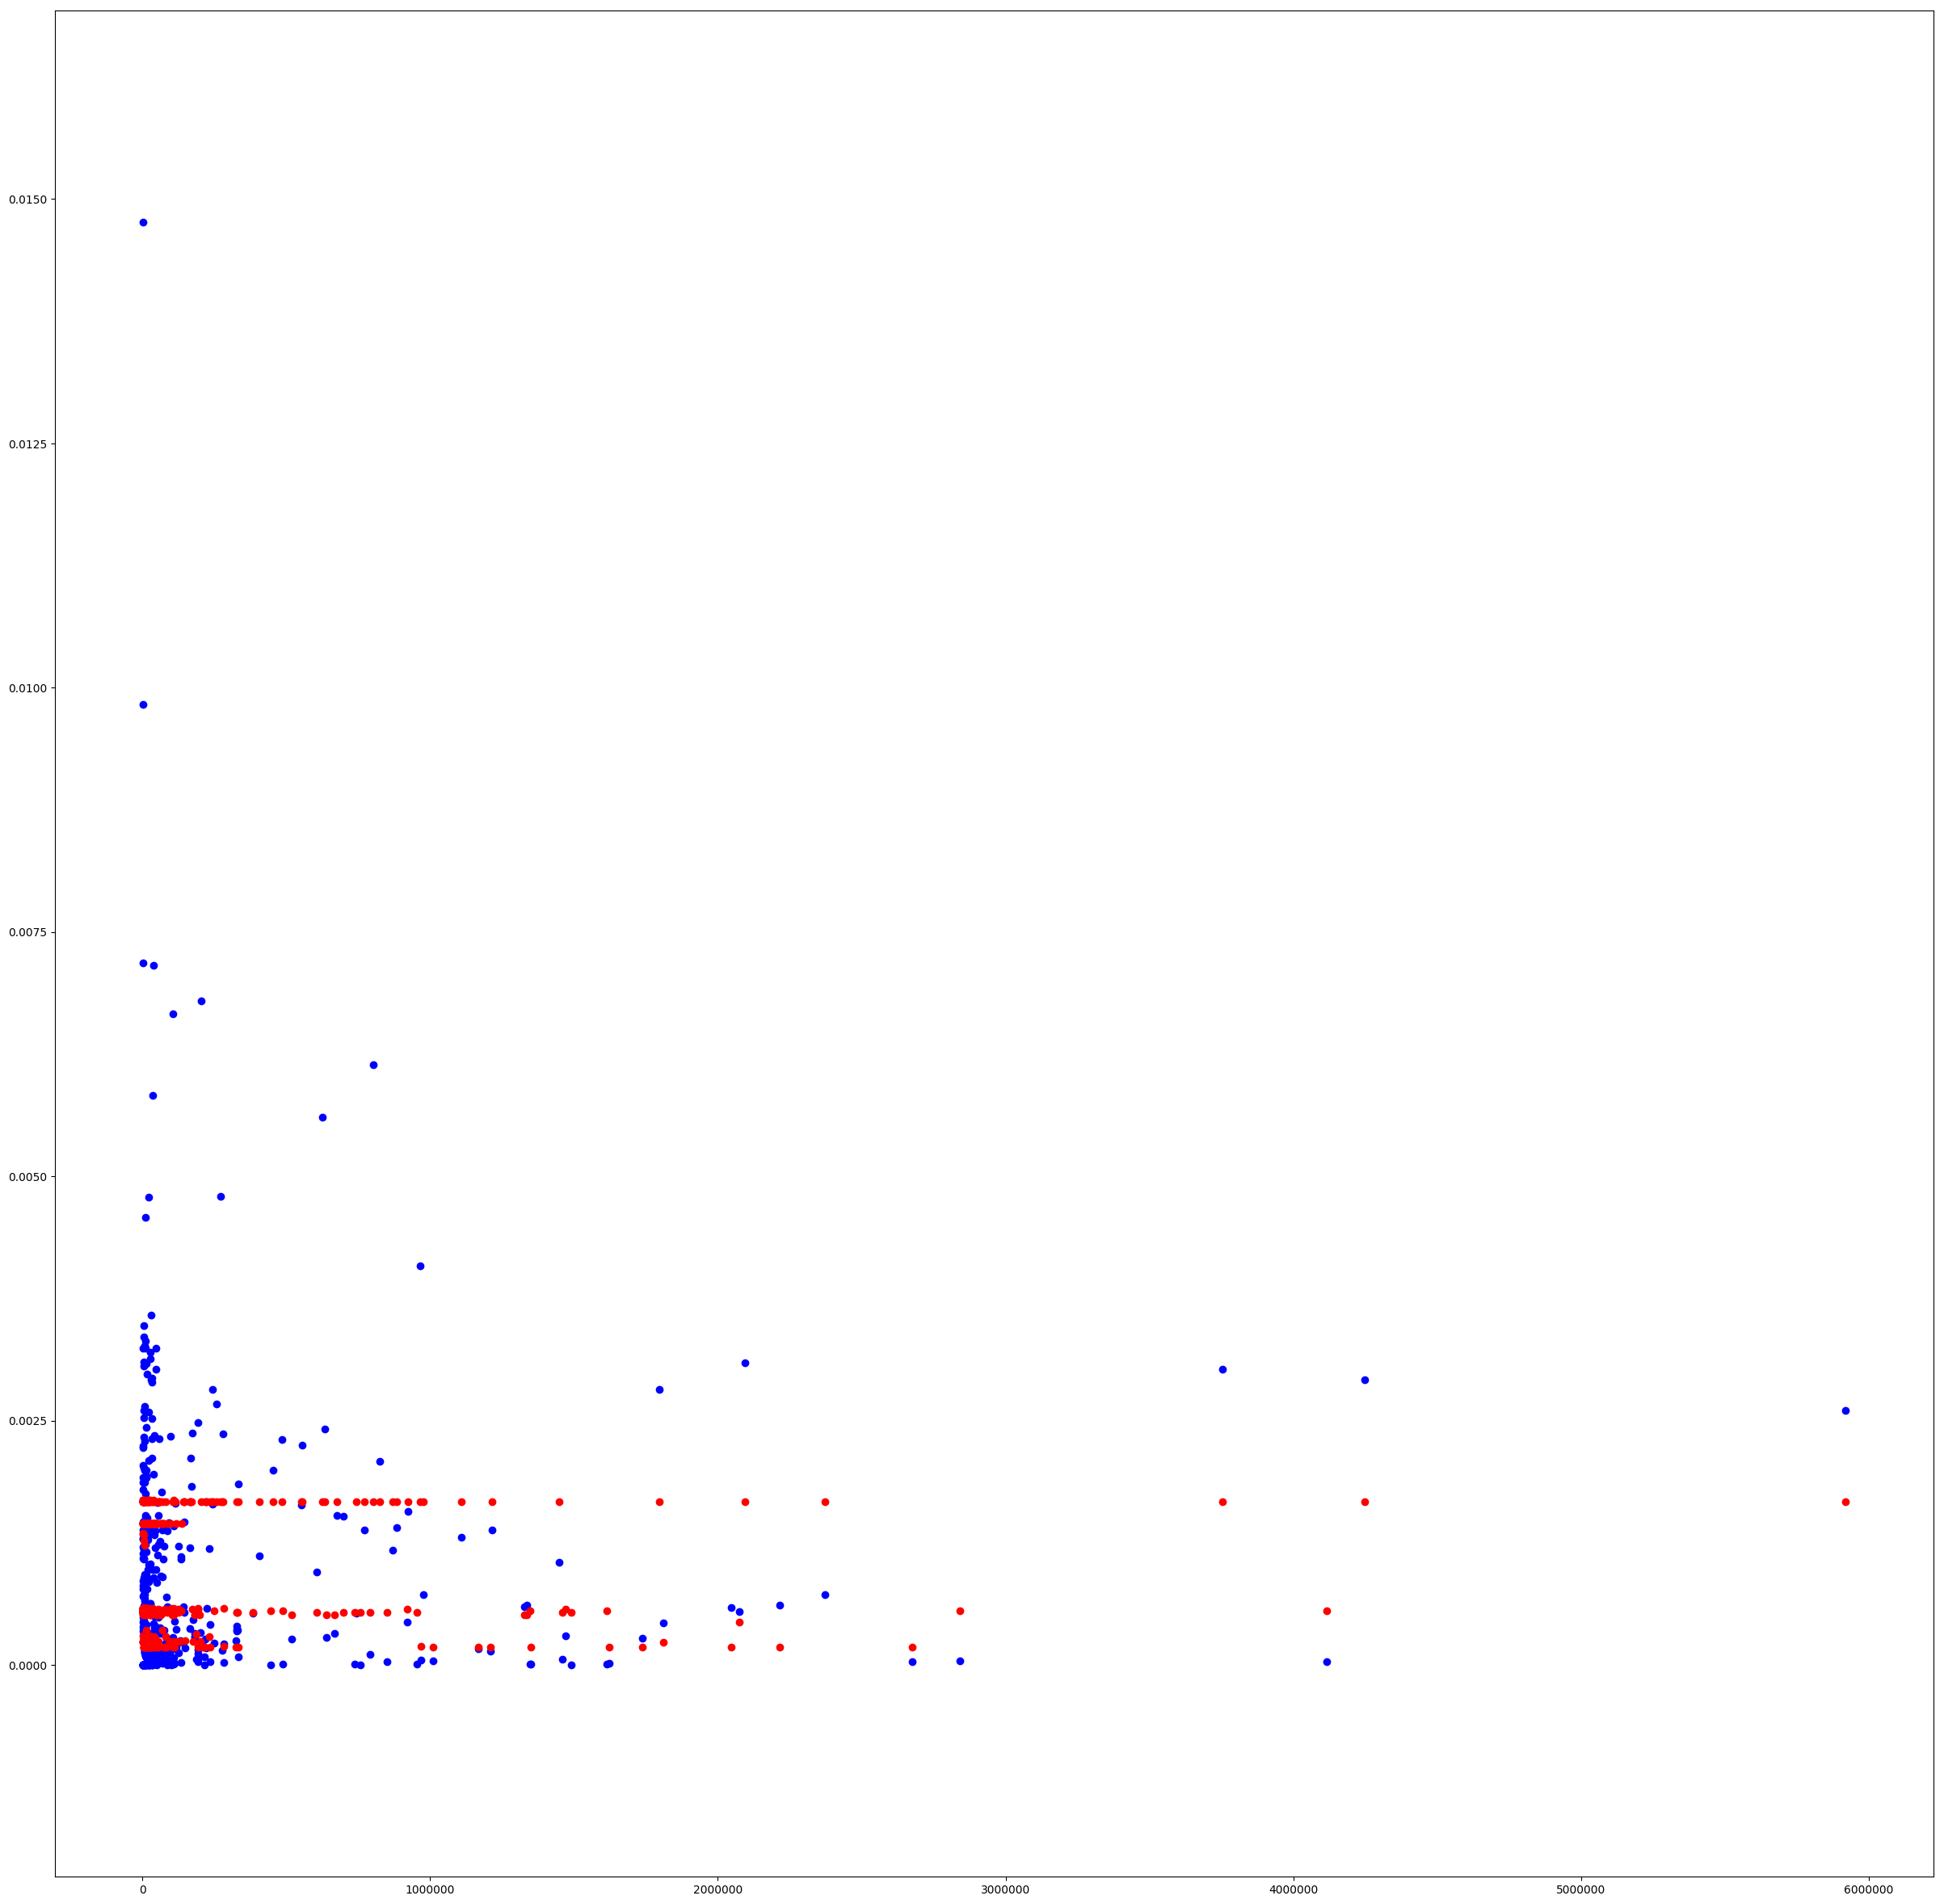

In [75]:
fig, axes = plt.subplots(figsize=(30,30))
axes.scatter(df3['impressions'],df5['totalConversionRate'],c=['b'])
axes.scatter(df3['impressions'],m3_hat,c=['r'])

axes = fig.add_axes()
plt.show()

<h1> Which OS has largest influence on conversion rate ? </h1>

In [76]:
View(df5)

In [77]:
df5['os_type_c'].unique()

[iOS, Windows, MAC OS, other, Android_Desktop, Android_Other]
Categories (6, object): [iOS, Windows, MAC OS, other, Android_Desktop, Android_Other]

In [78]:
OsBin = []
for os in df5['os_type_c'].unique():
    tempOs = []
    for i in range(len(df5)):
        if  df5['os_type_c'][i]== str(os):
            tempOs.append(1)
        else:
            tempOs.append(0)
    OsBin.append(pd.DataFrame(tempOs))

In [79]:
df5['iOS']=OsBin[0]
df5['Windows']=OsBin[1]
df5['MACos']=OsBin[2]
df5['other']=OsBin[3]
df5['Android_Desktop']=OsBin[4]
df5['Android_Other'] = OsBin[5]

<h1>Model with OS only</h1>

In [80]:
OS_bin = np.array(list(zip(
        df5['iOS'],
        df5['Windows'],
        df5['MACos'],
        df5['other'],
        df5['Android_Desktop'],
        df5['Android_Other'],
        )))

In [81]:
OS_bin

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [82]:
OS_mx = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 50, n_jobs=-1,
                           random_state=1,oob_score ='TRUE', max_features = 'auto')
OS_mx.fit(OS_bin,m2_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score='TRUE', random_state=1, verbose=0, warm_start=False)

In [83]:
OS_mx.feature_importances_

array([0.25559913, 0.55189924, 0.09213053, 0.06434976, 0.        ,
       0.03602134])

<h3> Compare the fit of the model </h3>

In [84]:
mean_squared_error(m2_Y,OS_mx.predict(OS_bin))

1.8712309811032097e-06

<h4> This model's performance is slightly worst </h4>

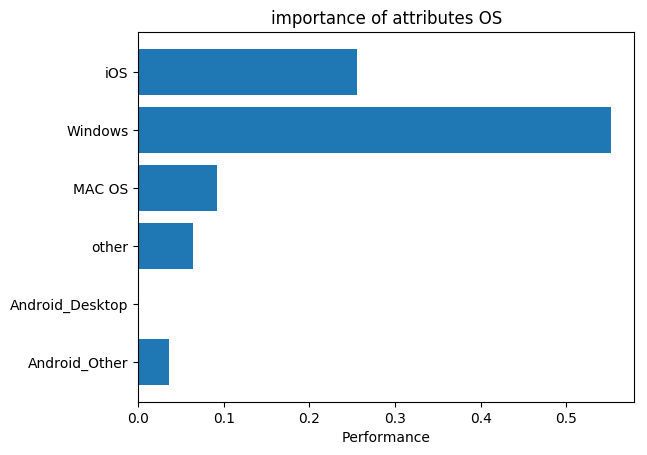

In [85]:
plt.rcdefaults()
fig3, ax3 = plt.subplots()


m2_feature = ('CLi','CSi','Cmi','dev_cvt','osid','impinv/imp','ctr')
OS_feature = ('iOS', 'Windows', 'MAC OS', 'other', 'Android_Desktop', 'Android_Other')
y_pos_OS = np.arange(len(OS_feature))
performance = OS_mx.feature_importances_
ax3.barh(y_pos_OS, performance,  align='center')
ax3.set_yticks(y_pos_OS)
ax3.set_yticklabels(OS_feature)
ax3.invert_yaxis()  # labels read top-to-bottom
ax3.set_xlabel('Performance')
ax3.set_title('importance of attributes OS')

plt.show()